In [1]:
from sklearn.manifold import Isomap
import pandas as pd
import numpy as np


In [2]:
embeddings_path="/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/SC_left/dim_256_batch_64_sigma_0.05/hcp_isomap_custom_embeddings/custom_cross_val_embeddings.csv"

In [4]:
# Load embeddings: shape (n_samples, embedding_dim)
embeddings = pd.read_csv(embeddings_path, index_col=0)
X = embeddings.values  # Convert to numpy array if needed


In [7]:
subject_ids = embeddings.index  # pour garder l'ID sujet

# === 2. Appliquer Isomap ===
isomap = Isomap(n_neighbors=5, n_components=6)
X_isomap = isomap.fit_transform(X)  # embeddings projetés dans l'espace 6D

# === 3. Sauvegarder sous forme de DataFrame avec bons noms ===
columns = [f"Isomap_central_left_dim{i+1}" for i in range(X_isomap.shape[1])]
df_isomap = pd.DataFrame(X_isomap, columns=columns, index=subject_ids)
df_isomap.index.name = "Subject"  # première colonne = Subject


In [8]:
output_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/SC_left/dim_256_batch_64_sigma_0.05/hcp_isomap_custom_embeddings/geodesic_distance_matrix.csv"
df_isomap.to_csv(output_path)

In [6]:
isomap = Isomap(n_neighbors=5, n_components=6)

# Fit the model
isomap.fit(X)

# Extract geodesic distance matrix (used internally by Isomap)
geodesic_distances = isomap.dist_matrix_  # shape: (n_samples, n_samples)

# Optionally convert to DataFrame and save
df_distances = pd.DataFrame(geodesic_distances)
df_distances.to_csv("/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/SC_left/dim_256_batch_64_sigma_0.05/hcp_isomap_custom_embeddings/geodesic_distance_matrix.csv", index=False)

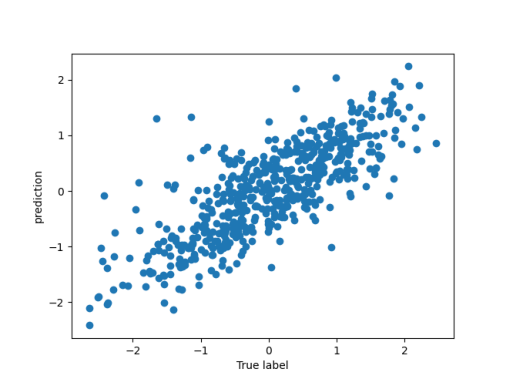

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/SC_left/dim_256_batch_64_sigma_0.05/hcp_isomap_custom_embeddings/Isomap_central_left_dim1/test_prediction_plot.png")
plt.imshow(img)
plt.axis('off')
plt.show()


In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

# === Load your isomap predictions (from embeddings) ===
X_path = "/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/SC_left/dim_256_batch_64_sigma_0.05/hcp_isomap_custom_embeddings/isomap_from_embeddings.csv"
X_df = pd.read_csv(X_path)
X_df = X_df.set_index("Subject")  # Ensure index is Subject

# === Load ground-truth isomaps ===
Y_path = "/neurospin/dico/data/deep_folding/current/datasets/hcp/hcp_isomap_labels_SC-sylv_left.csv"
Y_df = pd.read_csv(Y_path)
Y_df = Y_df.set_index("Subject")

# === Align subjects ===
common_subjects = X_df.index.intersection(Y_df.index)
X_df = X_df.loc[common_subjects]
Y_df = Y_df.loc[common_subjects]

# === Prepare data ===
X = StandardScaler().fit_transform(X_df.values)
Y = StandardScaler().fit_transform(Y_df.values)

# === Fit ElasticNetCV for each isomap dimension ===
print("ElasticNetCV Regression from model isomaps → ground-truth isomaps:\n")
for dim in range(Y.shape[1]):
    y_target = Y[:, dim]
    model = ElasticNetCV(cv=5, random_state=0)
    model.fit(X, y_target)
    y_pred = model.predict(X)
    
    r2 = r2_score(y_target, y_pred)
    print(f"Dim {dim+1} R² score: {r2:.4f}")


FileNotFoundError: [Errno 2] No such file or directory: '/neurospin/dico/babdelghani/Runs/02_champollion_v1/Output/yaware_volume/SC_left/dim_256_batch_64_sigma_0.05/hcp_isomap_custom_embeddings/isomap_from_embeddings.csv'